# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | monrovia
Processing Record 2 of Set 1 | cape girardeau
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | la passe
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | klyuchi
Processing Record 7 of Set 1 | papar
Processing Record 8 of Set 1 | siping
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | tanabe
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | saint-pierre
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | fale old settlement
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | acarau
Processing Record 19 of Set 1 | chinchilla
Processing Record 20 of Set 1 | nova sintra
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | longyearbyen
Processing

Processing Record 39 of Set 4 | zalari
Processing Record 40 of Set 4 | la'ie
Processing Record 41 of Set 4 | brownwood
Processing Record 42 of Set 4 | isle of lewis
City not found. Skipping...
Processing Record 43 of Set 4 | santiago de chuco
Processing Record 44 of Set 4 | portland
Processing Record 45 of Set 4 | camana
Processing Record 46 of Set 4 | qacha's nek
Processing Record 47 of Set 4 | yagry
City not found. Skipping...
Processing Record 48 of Set 4 | atafu village
Processing Record 49 of Set 4 | lumphat
Processing Record 0 of Set 5 | rabo de peixe
Processing Record 1 of Set 5 | daru
Processing Record 2 of Set 5 | el casar
Processing Record 3 of Set 5 | constantia
Processing Record 4 of Set 5 | ago-are
Processing Record 5 of Set 5 | nova xavantina
Processing Record 6 of Set 5 | sao felix do xingu
Processing Record 7 of Set 5 | beipiao
Processing Record 8 of Set 5 | talnakh
Processing Record 9 of Set 5 | sinabang
Processing Record 10 of Set 5 | salekhard
Processing Record 11 of

Processing Record 27 of Set 8 | tevriz
Processing Record 28 of Set 8 | ejido benito juarez
City not found. Skipping...
Processing Record 29 of Set 8 | awjilah
Processing Record 30 of Set 8 | el granada
Processing Record 31 of Set 8 | malvan
Processing Record 32 of Set 8 | soller
Processing Record 33 of Set 8 | chonchi
Processing Record 34 of Set 8 | leava
Processing Record 35 of Set 8 | rukban
City not found. Skipping...
Processing Record 36 of Set 8 | acajutla
Processing Record 37 of Set 8 | ulladulla
Processing Record 38 of Set 8 | kapoeta
Processing Record 39 of Set 8 | loppi
Processing Record 40 of Set 8 | queenstown
Processing Record 41 of Set 8 | haiku-pauwela
Processing Record 42 of Set 8 | al bahah
Processing Record 43 of Set 8 | hilo
Processing Record 44 of Set 8 | mahina
Processing Record 45 of Set 8 | am timan
Processing Record 46 of Set 8 | orapa
Processing Record 47 of Set 8 | jinchang
Processing Record 48 of Set 8 | palmares do sul
Processing Record 49 of Set 8 | ouellah


Processing Record 16 of Set 12 | kolokani
Processing Record 17 of Set 12 | aykhal
Processing Record 18 of Set 12 | silifke
Processing Record 19 of Set 12 | williamsport
Processing Record 20 of Set 12 | frenchville
Processing Record 21 of Set 12 | tranovaho
City not found. Skipping...
Processing Record 22 of Set 12 | urangan
Processing Record 23 of Set 12 | morris
Processing Record 24 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 25 of Set 12 | auki
Processing Record 26 of Set 12 | sinop
Processing Record 27 of Set 12 | mermoz boabab
Processing Record 28 of Set 12 | manakara
Processing Record 29 of Set 12 | fisterra
Processing Record 30 of Set 12 | rosalie
Processing Record 31 of Set 12 | yenotayevka
Processing Record 32 of Set 12 | jauja
Processing Record 33 of Set 12 | baranivka
Processing Record 34 of Set 12 | selfoss
Processing Record 35 of Set 12 | moree
Processing Record 36 of Set 12 | bilara
Processing Record 37 of Set 12 | toga village
City not found. Skipp

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nahiyat ash shinafiyah,31.5874,44.6602,291.52,27,100,5.52,IQ,1701245986
1,enewetak,11.3474,162.3373,300.96,81,89,9.28,MH,1701245987
2,bethel,41.3712,-73.4140,271.77,66,20,3.09,US,1701245751
3,zemio,5.0314,25.1361,300.67,69,100,0.99,CF,1701245989
4,kodiak,57.7900,-152.4072,273.88,100,100,0.00,US,1701245990


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,monrovia,6.3005,-10.7969,300.85,88,36,1.14,LR,1710621655
1,cape girardeau,37.3834,-89.7168,292.48,35,69,5.77,US,1710621656
2,bilibino,68.0546,166.4372,251.74,92,21,1.32,RU,1710621656
3,la passe,45.5549,-0.8967,287.60,82,100,3.61,FR,1710621656
4,grytviken,-54.2811,-36.5092,277.89,86,34,4.37,GS,1710621657


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

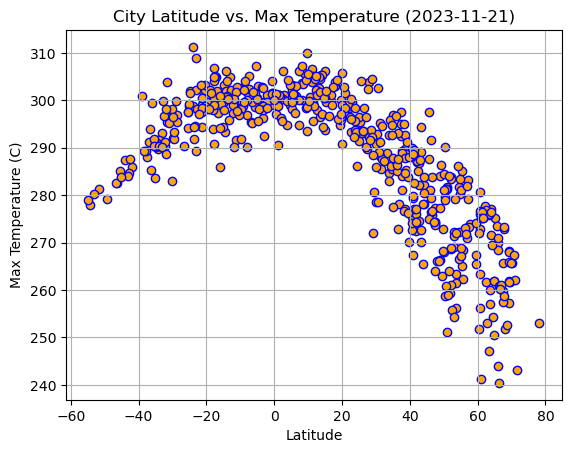

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="blue", color="orange")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-11-21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

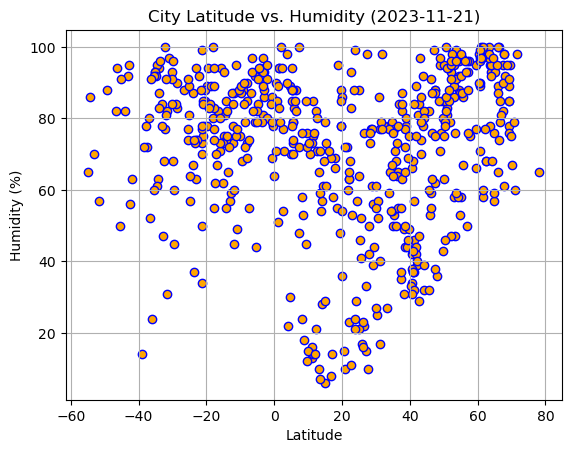

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="blue", color="orange")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-11-21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

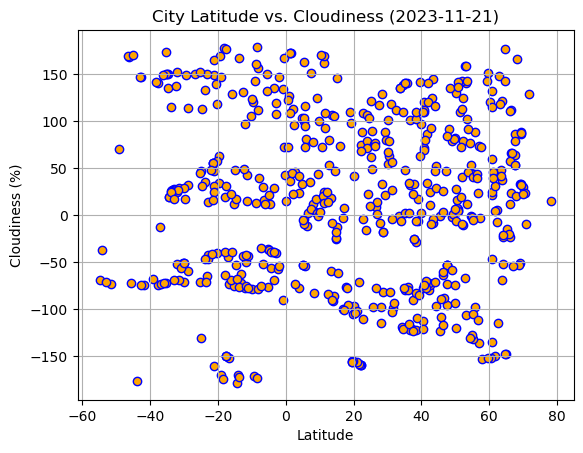

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Lng"], edgecolors="blue", color="orange")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-11-21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

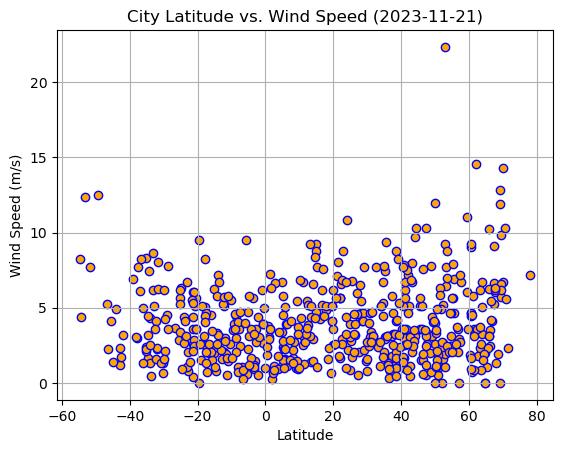

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="blue", color="orange")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-11-21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_eq = f"y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print("The r-value is:", r_value)
    plt.figure(figsize=(7, 7))
    plt.scatter(x_values,y_values, edgecolor="blue", color="orange")
    plt.plot(x_values,regression_values,"r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,monrovia,6.3005,-10.7969,300.85,88,36,1.14,LR,1710621655
1,cape girardeau,37.3834,-89.7168,292.48,35,69,5.77,US,1710621656
2,bilibino,68.0546,166.4372,251.74,92,21,1.32,RU,1710621656
3,la passe,45.5549,-0.8967,287.60,82,100,3.61,FR,1710621656
5,klyuchi,52.2667,79.1667,268.59,93,100,5.19,RU,1710621657


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,grytviken,-54.2811,-36.5092,277.89,86,34,4.37,GS,1710621657
8,adamstown,-25.0660,-130.1015,298.77,81,42,5.62,PN,1710621575
9,port-aux-francais,-49.3500,70.2167,279.28,88,100,12.50,TF,1710621659
12,saint-pierre,-21.3393,55.4781,298.97,73,0,2.57,RE,1710621660
13,margaret river,-33.9500,115.0667,290.52,94,6,4.30,AU,1710621576


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8657803039561378


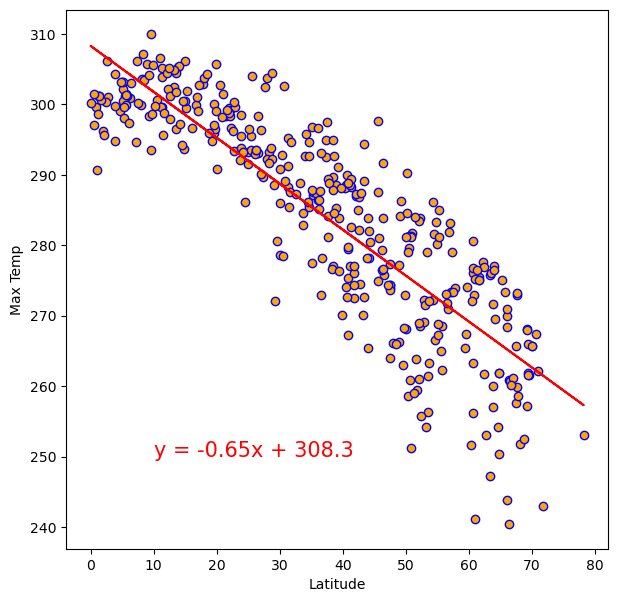

In [26]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 'Max Temp',(10,250))

The r-value is: 0.6892306642421384


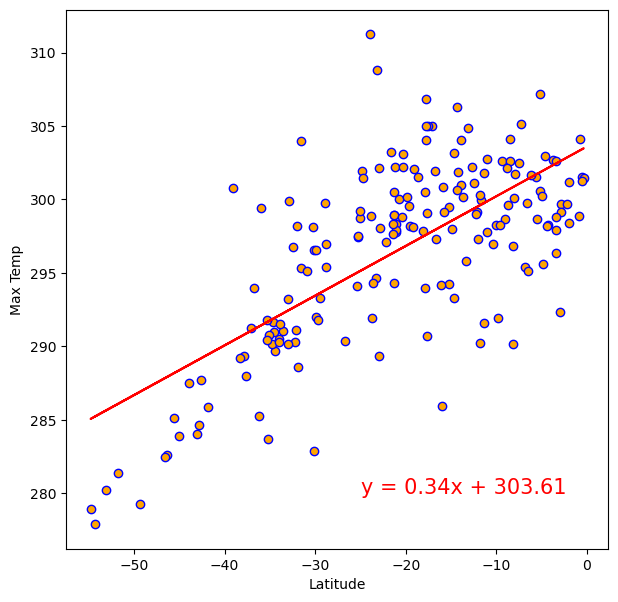

In [27]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],'Max Temp',(-25, 280))

**Discussion about the linear relationship:** 

In the northern hemisphere, there is a strong negative correlation between temperature and latitude, indicating that temperature tends to decrease as latitude increases.
In the southern hemisphere, there is a moderate positive correlation between temperature and latitude, indicating that temperature tends to increase as latitude increases.





### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2579315438644821


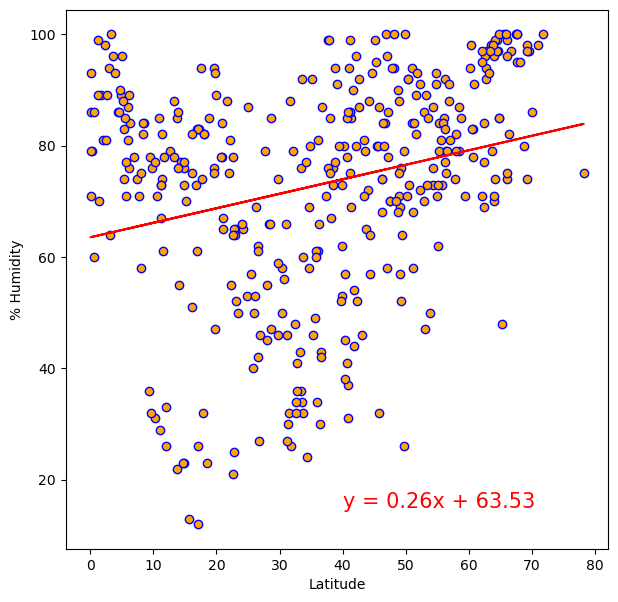

In [69]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], '% Humidity',(40,15))

The r-value is: 0.202716287502027


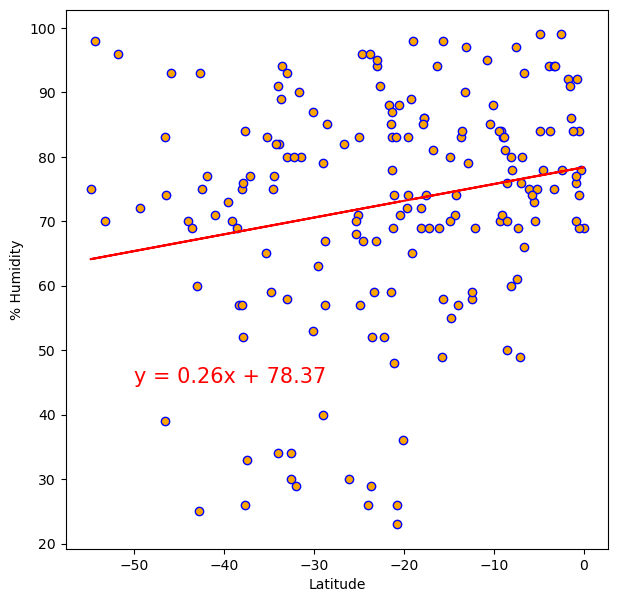

In [70]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],'% Humidity',(-50,45))

**Discussion about the linear relationship:** 

In both the northern and southern hemispheres, there is a weak positive correlation between humidity and latitude, suggesting a slight increase in humidity as latitude increases, but the relationship is not very strong.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10780067240316128


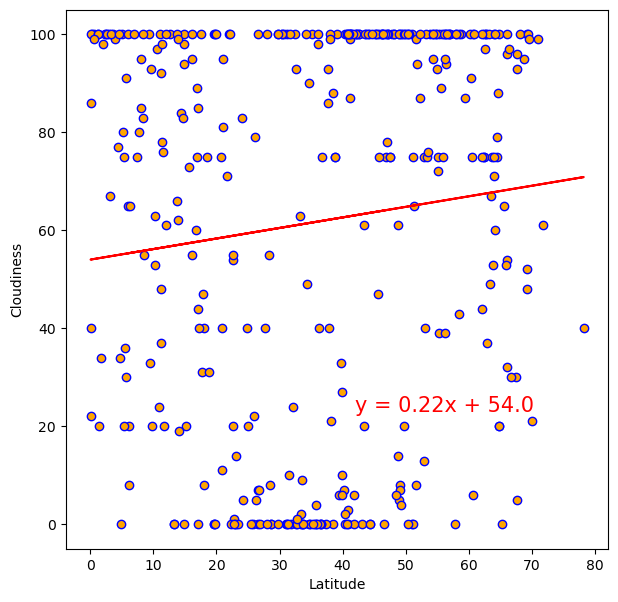

In [73]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 'Cloudiness', (42,23))

The r-value is: 0.1063298415298278


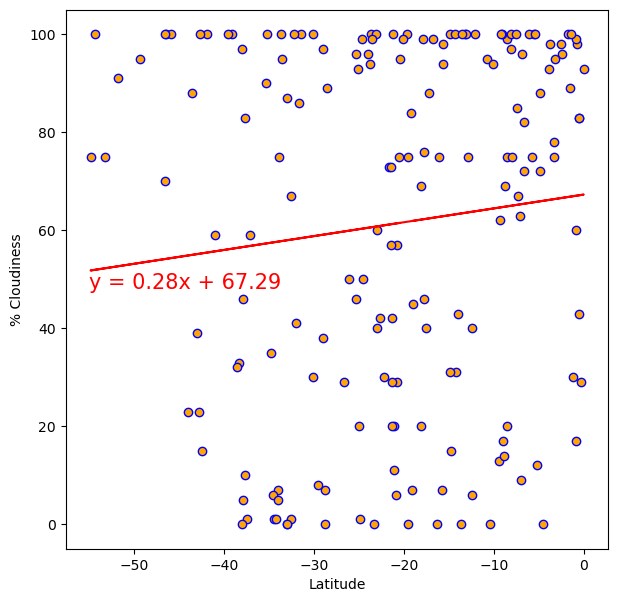

In [76]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], '% Cloudiness',(-55,48))

**Discussion about the linear relationship:** 

In both the northern and southern hemispheres, there is a very weak positive correlation between cloudiness and latitude, indicating a slight tendency for cloudiness to increase as latitude increases, but the relationship is not statistically significant.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.20780493742929557


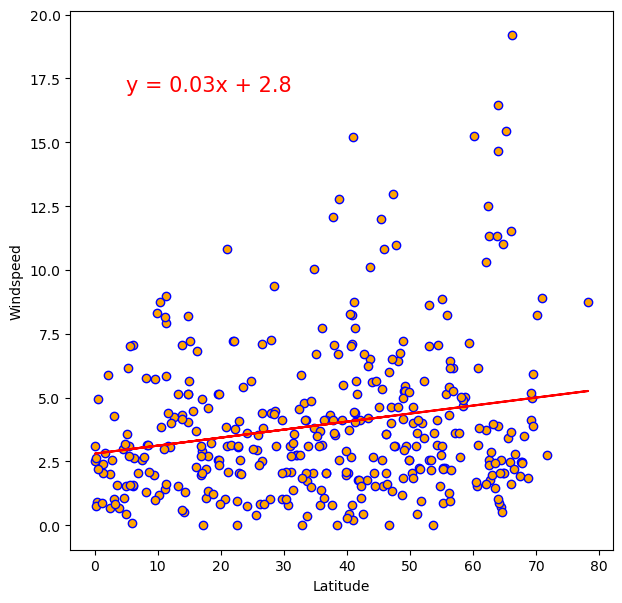

In [80]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Windspeed",(5,17))

The r-value is: -0.21263431628844892


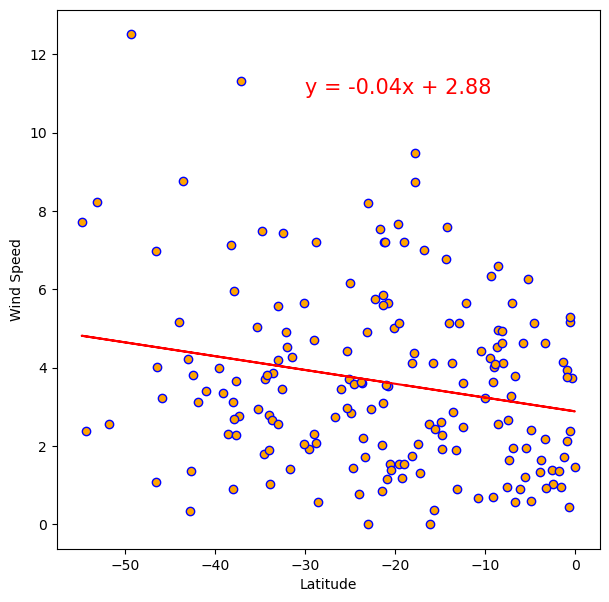

In [83]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed",(-30, 11))

**Discussion about the linear relationship:** 

In the northern hemisphere, there is a weak positive correlation between wind speed and latitude, suggesting a slight increase in wind speed as latitude increases.
In the southern hemisphere, there is a weak negative correlation between wind speed and latitude, indicating a slight decrease in wind speed as latitude increases.